## Importing required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data

In [4]:
data = pd.read_csv("../Data Analysis/train.csv")

## Quering Data

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Definitions

Passenger Id - Unique Id of each passenger on the ship

Survived - '0' for not survived & '1' for survived

Pclass - Passenger class: '1' for 1st class, '2' for 2nd class & '3' for 3rd class

Name - Passenger name

Sex - Passenger gender: 'male' or 'female'

Age - Passenger age

SibSp - No. of siblings or spouses aborded Titanic together with the passenger

Parch - No. of parents or children aborded Titanic together with the passenger

Ticket - Passenger ticket number

Fare - Passenger ticket fare

Cabin - Passenger cabin number

Embarked - Encoded name of city passenger embarked

# Data Cleaning

In [7]:
print(data.shape)

(891, 12)


In [8]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB
None


From the above output, we see that Age, Cabin, and Embarked have missing values.

In [10]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
data.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",male,1601,G6,S
freq,1,577,7,4,644


In [12]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [13]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
data['Sex'].value_counts(normalize = True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [15]:
data['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [16]:
data.loc[0:10,'Name':'Parch']

,Name,Sex,Age,SibSp,Parch
0,"Braund, Mr. Owen Harris",male,22.0,1,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0
2,"Heikkinen, Miss. Laina",female,26.0,0,0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0
4,"Allen, Mr. William Henry",male,35.0,0,0
5,"Moran, Mr. James",male,NaN,0,0
6,"McCarthy, Mr. Timothy J",male,54.0,0,0
7,"Palsson, Master. Gosta Leonard",male,2.0,3,1
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2
9,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0


In [17]:
data.iloc[0:10,0:5]

,PassengerId,Survived,Pclass,Name,Sex
0,1,0,3,"Braund, Mr. Owen Harris",male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,3,1,3,"Heikkinen, Miss. Laina",female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,5,0,3,"Allen, Mr. William Henry",male
5,6,0,3,"Moran, Mr. James",male
6,7,0,1,"McCarthy, Mr. Timothy J",male
7,8,0,3,"Palsson, Master. Gosta Leonard",male
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female


In [18]:
data[data['Age'] == data[data['Sex'] == 'male']['Age'].min()]['Name']

803    Thomas, Master. Assad Alexander
Name: Name, dtype: object

In [19]:
data.sort_values(by='Name').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.55,NaN,S
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.25,NaN,S
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.25,NaN,S
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.00,NaN,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.00,NaN,C


In [20]:
data.sort_values(by=['Name','Age'],ascending=[True,True]).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.55,NaN,S
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.25,NaN,S
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.25,NaN,S
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.00,NaN,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.00,NaN,C


In [21]:
d = {'male':0 , 'female': 1}
data['Sex'] = data['Sex'].map(d)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [22]:
o = {0:'male' , 1:'female'}
data = data.replace({'Sex':o})
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
data.groupby(by='Survived')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


In [24]:
data.groupby(by='Embarked')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Embarked,,,,,,,,
C,130.0,30.814769,15.434860,0.42,21.25,29.0,40.0,71.0
Q,28.0,28.089286,16.915396,2.00,17.50,27.0,34.5,70.5
S,554.0,29.445397,14.143192,0.67,21.00,28.0,38.0,80.0


In [25]:
data.groupby(by='Embarked')['Age'].agg(np.mean)

Embarked
C    30.814769
Q    28.089286
S    29.445397
Name: Age, dtype: float64

In [26]:
pd.crosstab(data['Sex'],data['Embarked'],normalize = True)

Embarked,C,Q,S
Sex,,,
female,0.082115,0.040495,0.228346
male,0.106862,0.046119,0.496063


In [27]:
data.pivot_table(['Age','Fare'],['Survived'],aggfunc = 'mean')

,Age,Fare
Survived,,
0,30.626179,22.117887
1,28.343690,48.395408


## Data Visualization

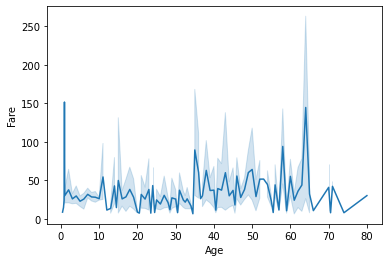

In [28]:
sns.lineplot(x='Age',y='Fare',data=data)

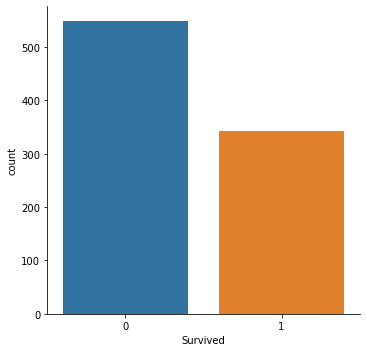

In [30]:
sns.catplot(x='Survived',data=data,kind = 'count')

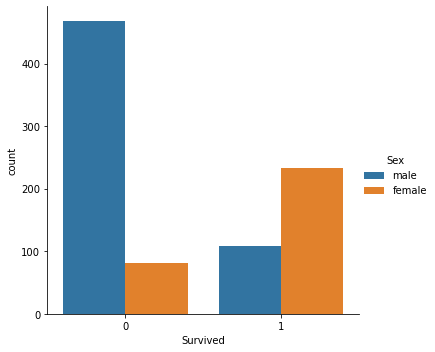

In [32]:
sns.catplot(x='Survived',data = data , kind = 'count', hue = 'Sex')

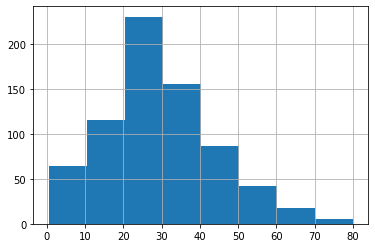

In [33]:
data['Age'].hist(bins=8)

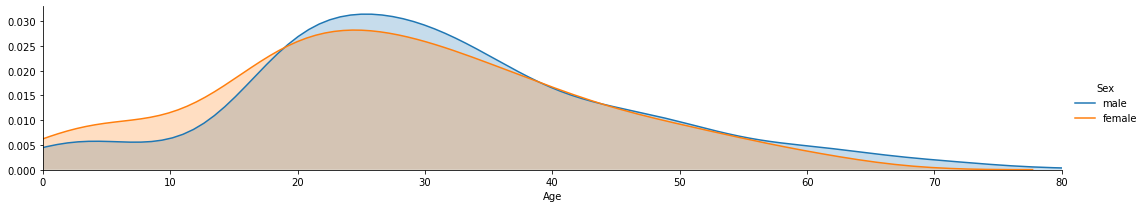

In [34]:
as_fig = sns.FacetGrid(data,hue='Sex',aspect=5)
as_fig.map(sns.kdeplot,'Age',shade=True)
oldest = data['Age'].max()
as_fig.set(xlim=(0,oldest))
as_fig.add_legend()

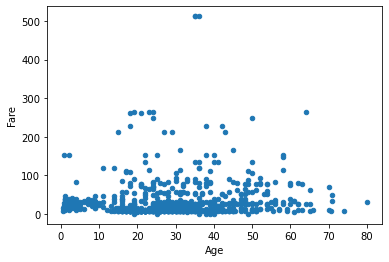

In [35]:
data.plot.scatter(x='Age',y='Fare')

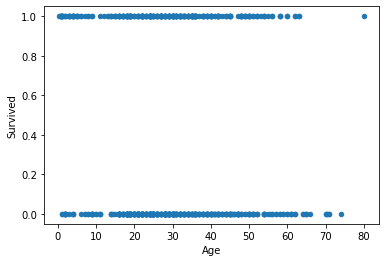

In [36]:
data.plot.scatter(x='Age',y='Survived')

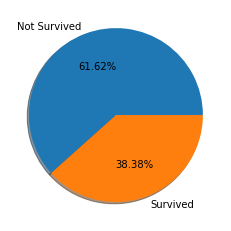

In [37]:
sizes = data['Survived'].value_counts()
fig , ax = plt.subplots()
ax.pie(sizes,labels = ['Not Survived','Survived'],autopct='%1.2f%%',shadow = True)
plt.show()